In [1]:
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np

from oddata import ODData
from dataset import DataSet
from divergence import Div
from transgm import TransGM

In [2]:
# Origin-Destination Data Processing Pipeline

# [1] - Assign OD data points into a unified grid

# Initialize ODData instances with spatial parameters
od_coventry = ODData(
    spacing_km=3,    # 3km grid spacing
    size=(8, 8)      # 8x8 target grid size
)

od_birmingham = ODData(
    spacing_km=4,    # 5km grid spacing  
    size=(8, 8)      # 8x8 target grid size
)

# Load OD trip data and POI data for each city
# Loads CSV files and processes POI categories
od_coventry.load_data('coventry')
od_birmingham.load_data('Birmingham')

# Extract coordinates from geometry strings in the loaded data
od_coventry.preprocess()
od_birmingham.preprocess()

# Generate origin-destination matrices with trip counts and spatial features
# Returns DataFrame with OD pairs, counts, distances, and POI features
df_od_birmingham = od_birmingham.create_od_matrix()
df_od_coventry = od_coventry.create_od_matrix()

Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.05556910234777718, 0.031479621561970525)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.0039692215962697985, 0.031479621561970525)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.0039692215962697985, 0.029058112211049716)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.0039692215962697985, 0.031479621561970525)
Data shape: (36, 3)
dest_tensor shape: (8, 8, 11)
Best bandwidth: (0.05556910234777718, 0.0266366028601289

In [3]:
print(od_birmingham.categories)

['business', 'eatery', 'education', 'financial', 'historical', 'industrial', 'leisure', 'medical', 'religious', 'shopping', 'transport']


In [4]:
# [2] Destination features
grid1 = od_birmingham.destinations[:,:,5]
grid2 = od_coventry.destinations[:,:,5]

In [5]:
div = Div()

In [6]:
results = {}
od_coventry.categories = sorted(od_coventry.categories)

In [7]:
i = 0
for c in od_coventry.categories:
    grid1 = od_coventry.destinations[:, :, i]
    grid2 = od_birmingham.destinations[:, :, i]
    print(grid1.shape, grid2.shape)

    jsd_div = div.compute(grid1, grid2)
    print(grid1.shape, grid2.shape)

    local_jsd,a,b = div.local_div_map(grid1, grid2)
    local_mean = np.mean(local_jsd)

    results[c] = {
        'feature': c,
        'observed_divergence': jsd_div,
    }

    results[c] = jsd_div


    i += 1

df_divs = pd.DataFrame([results])
df_divs.transpose()

(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)
(8, 8) (8, 8)


,0
business,0.122384
eatery,0.143330
education,0.122153
financial,0.127167
historical,0.109514
industrial,0.229545
leisure,0.388161
medical,0.175627
religious,0.163172
shopping,0.171375


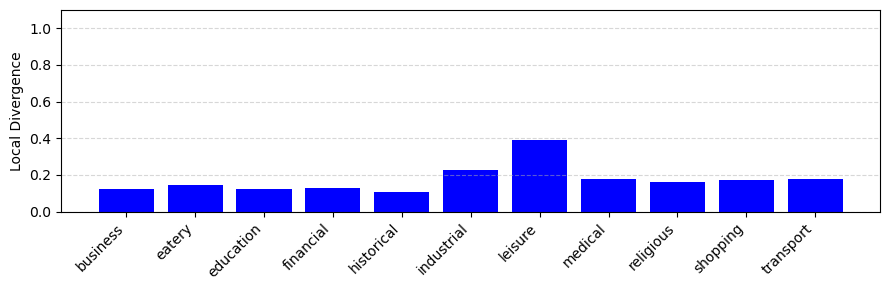

In [8]:
# Plotting
plt.figure(figsize=(9, 3))
bars = plt.bar(list(results.keys()), list(results.values()), color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Local Divergence")
# plt.title("Cosine Divergence per Feature with CV1 and CV2")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [9]:
# TODO: set dataset to the model
# unify the dataset before the div and the model
tgm = TransGM()

In [10]:
bir_dataset = DataSet('birmingham')
cov_dataset = DataSet('coventry')

tgm.load_data(bir_dataset)
tgm.load_data(cov_dataset)

Loaded dataset for birmingham
Loaded dataset for coventry


In [11]:
model = tgm.fit('birmingham', serial=1)

Baseline model birmingham - Run# 1_b935f741

Original dataset shape: (687, 19)
Original y shape: (687,)
Original X shape: (687, 18)
Using the entire dataset (sample_ratio = 1.0)

--- Outer Fold 1/5 ---
Evaluating: lambda=0.001, max_iter=100, init=random
Inner fold 1: val_r2=0.8080
Inner fold 2: val_r2=0.8804
Inner fold 3: val_r2=0.8169
Mean validation R² = 0.8351
Evaluating: lambda=0.001, max_iter=100, init=uniform_positive
Inner fold 1: val_r2=0.7931
Inner fold 2: val_r2=0.8423
Inner fold 3: val_r2=0.7990
Mean validation R² = 0.8115
Evaluating: lambda=0.001, max_iter=200, init=random
Inner fold 1: val_r2=0.7853
Inner fold 2: val_r2=0.8600
Inner fold 3: val_r2=0.8273
Mean validation R² = 0.8242
Evaluating: lambda=0.001, max_iter=200, init=uniform_positive
Inner fold 1: val_r2=0.7931
Inner fold 2: val_r2=0.8423
Inner fold 3: val_r2=0.7990
Mean validation R² = 0.8115
Evaluating: lambda=0.01, max_iter=100, init=random
Inner fold 1: val_r2=0.7060
Inner fold 2: val_r2=0.7785
Inner fold 3: v

In [12]:
model.results('base').to_dataframe().transpose()

,0
model_name,Baseline_Model
serial,1
model_sample,1.0
decay_function,exp
source,birmingham
target,None
init_beta,0.973923
init_alpha,0.10241
init_e,0.036116
init_gamma_0,0.432113


In [13]:
model.transfer('coventry').results('trans').to_dataframe().transpose()

Naive transfer model coventry - Run# 0_56d5eab1


Testing final model on another city dataset...
Original dataset shape: (524, 19)
Original y shape: (524,)
Original X shape: (524, 18)
Using the entire dataset (sample_ratio = 1.0)
-------------------------------------
Final model R²: 0.7471
Final model MAE: 0.0565
Final model MSE: 0.0011
-------------------------------------


,0
model_name,Naive_Transfer_coventry
serial,1
model_sample,1.0
decay_function,exp
source,birmingham
target,coventry
init_beta,0.973923
init_alpha,0.10241
init_e,0.036116
init_gamma_0,0.432113


In [14]:
model.load_divs(results).adapt('coventry').results('adapt').to_dataframe().transpose()

Adapt model coventry - Run# 0_63a9f80f


Testing final model on another city dataset...
Original dataset shape: (524, 19)
Original y shape: (524,)
Original X shape: (524, 18)
Using the entire dataset (sample_ratio = 1.0)

=== Source: birmingham Results ===
Optimal beta: 0.07917
Optimal alpha: 0.0
Optimal gamma: [0.23794, 0.43827, 0.63585, 0.27331, 0.09872, 0.84555, 1.79655, 0.35078, 0.61486, 0.27844, 0.65007]
Optimal e: 0.03612

Source RMSE: 0.0005
Source R²: 0.8188
Starting cross-validation for hyperparameter tuning...
optimal_gamma: (11,)
optimal_gamma: (11,)
optimal_gamma: (11,)
optimal_gamma: (11,)
optimal_gamma: (11,)
Mean R² for k=0.01, lambda=0.001: 0.8389
k=0.01, lambda=0.001: Mean validation R²=0.8389
optimal_gamma: (11,)
optimal_gamma: (11,)
optimal_gamma: (11,)
optimal_gamma: (11,)
optimal_gamma: (11,)
Mean R² for k=0.01, lambda=0.01: 0.7702
k=0.01, lambda=0.01: Mean validation R²=0.7702
optimal_gamma: (11,)
optimal_gamma: (11,)
optimal_gamma: (11,)
optimal_gamma: (11,)
opti

,0
model_name,Adapt_Model
serial,0
model_sample,0.5
decay_function,exp
source,birmingham
target,coventry
init_beta,0.079172
init_alpha,0.000001
init_e,3.136252
init_gamma_0,0.237944


In [ ]:
# TODO: 
# 1. add flag for verbose
# 2. it seems base param_log is saved
# 3. done: calc div
# 4. plot some results
# 5. refactor adapt function
# 6. remove unused code
# 7. done: show how to create city grid!!!!! Example spatial_grid_od.ipynb in TranSIM